Every burst generates its own CFD. This is used after a coarse search algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import os

import sys
sys.path.append('./../')
import modules.modulesCorrectionFactorsAndPlots as MCF
import modules.modulesPopulationFitting as PF
import PDA as PDA
import TwoStateKineticModel as KM2S
import PDA_FastDescent as PDA_FD

### Work Flow For High Resolution Parameter Exploration

#### Load Data, Take A Sample 
Note: No FRET2CDE Filter to ensure bridge data points

In [2]:
NUMBER_DURATION_BINS = 500
N = 200
ROOT_DIR = './optimisingLoop/'

# Minimise

## All k1, kminus1 starting guesses 100

### Need to allow specification of options

NaCl: 50.0, E1: 0.05, E2: 0.83
k1: 98.2634	 kminus1: 171.7893 Evaluated and added.
k1: 126.2724	 kminus1: 197.7676 Evaluated and added.
k1: 197.0430	 kminus1: 292.6577 Evaluated and added.
k1: 282.1471	 kminus1: 421.1006 Evaluated and added.
k1: 359.3793	 kminus1: 546.3987 Evaluated and added.
k1: 421.5367	 kminus1: 657.8503 Evaluated and added.
k1: 464.5035	 kminus1: 751.7730 Evaluated and added.
k1: 492.9539	 kminus1: 850.5952 Evaluated and added.
k1: 510.2117	 kminus1: 984.6836 Evaluated and added.
k1: 510.9877	 kminus1: 1109.1049 Evaluated and added.
k1: 506.7202	 kminus1: 1182.5910 Evaluated and added.
k1: 506.9366	 kminus1: 1207.2771 Evaluated and added.
k1: 508.9517	 kminus1: 1216.9556 Evaluated and added.
k1: 509.1113	 kminus1: 1217.7299 Evaluated and added.
k1: 509.1128	 kminus1: 1217.7311 Evaluated and added.
k1: 509.1138	 kminus1: 1217.7376 Evaluated and added.
k1: 509.1138	 kminus1: 1217.7376 Evaluated and added.
k1: 509.1138	 kminus1: 1217.7376 Evaluated and added.
      f

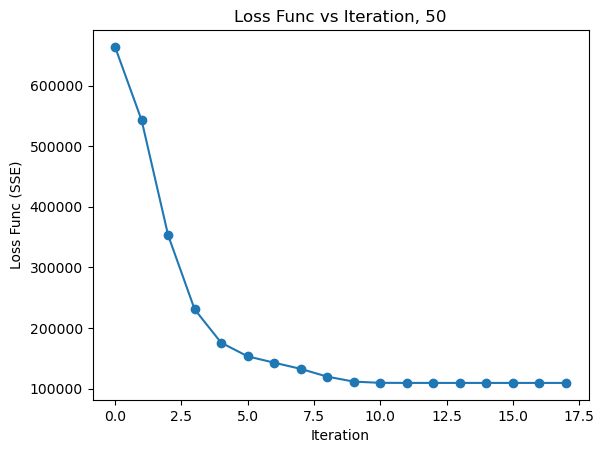

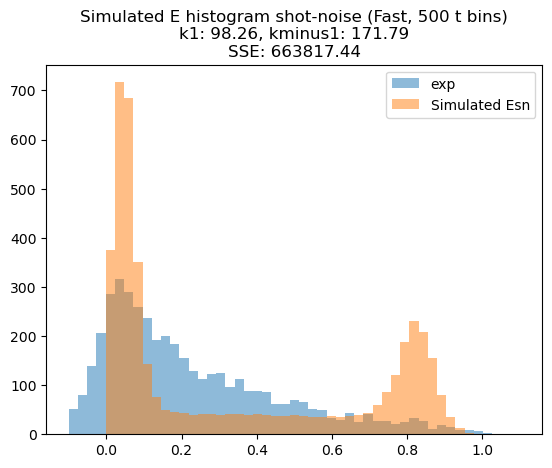

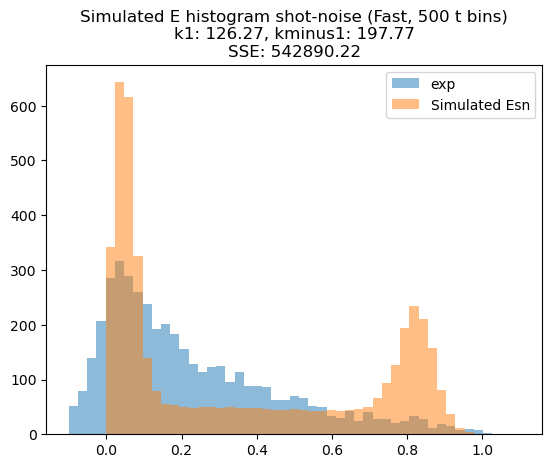

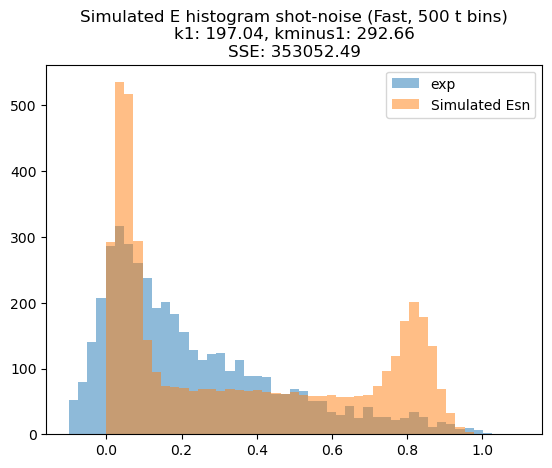

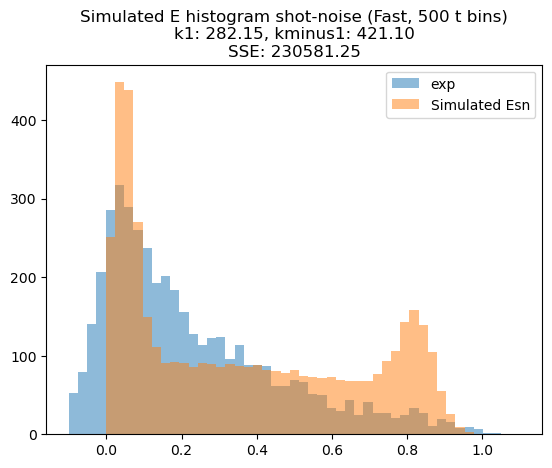

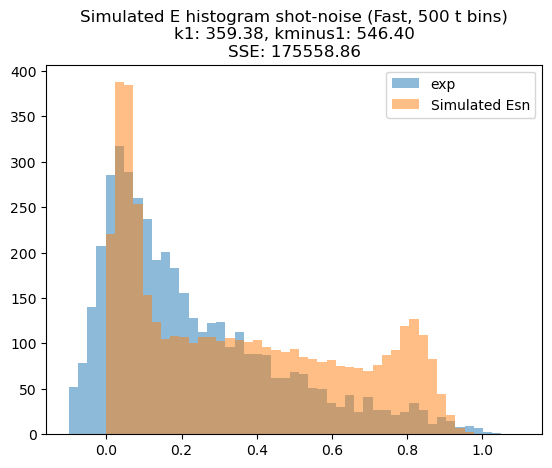

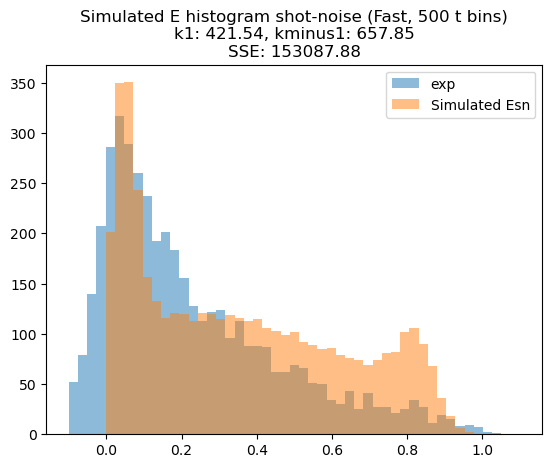

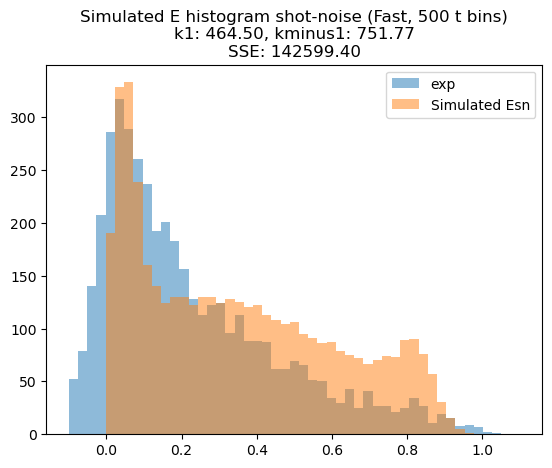

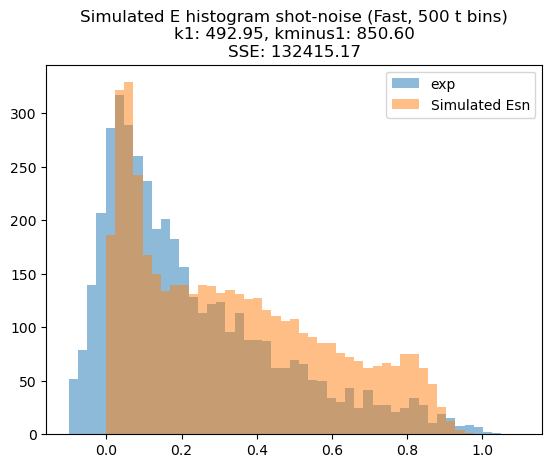

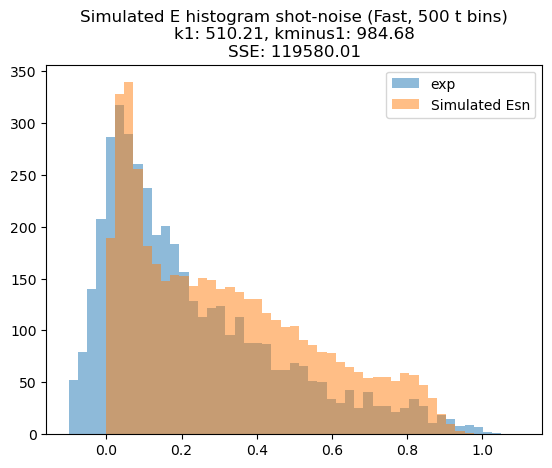

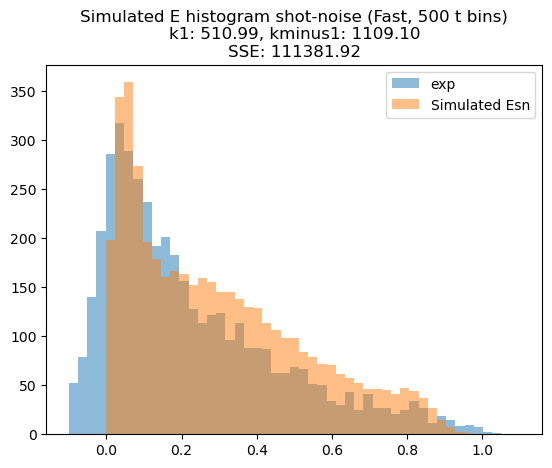

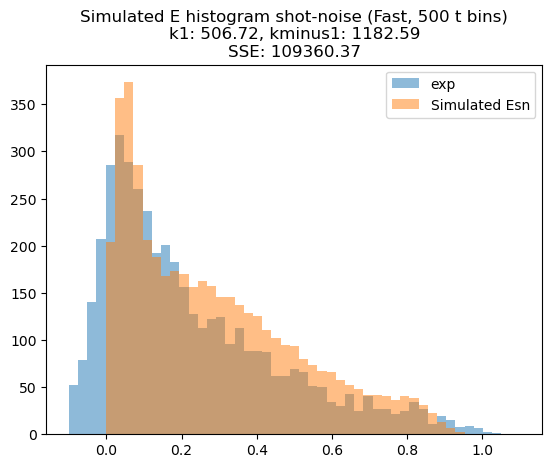

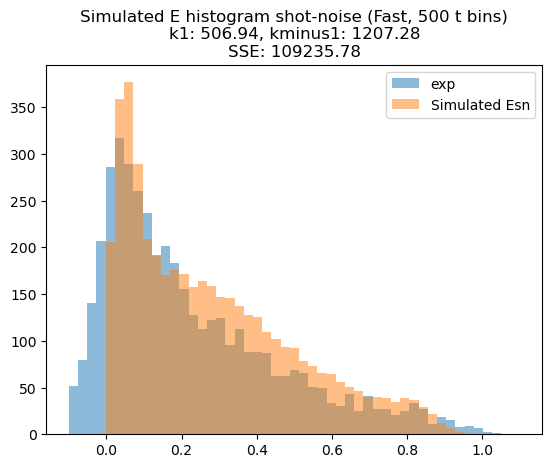

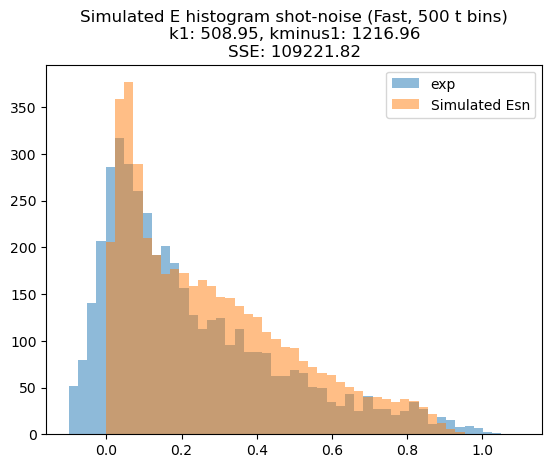

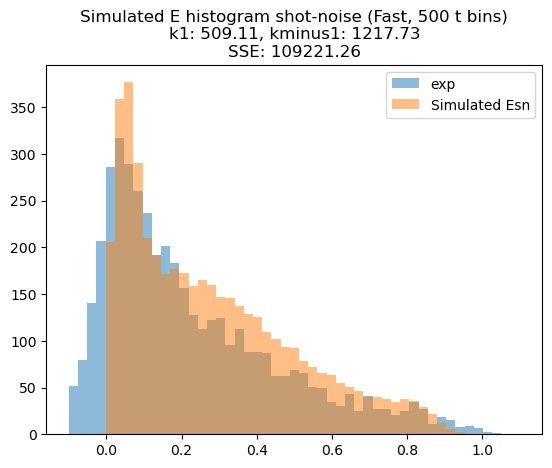

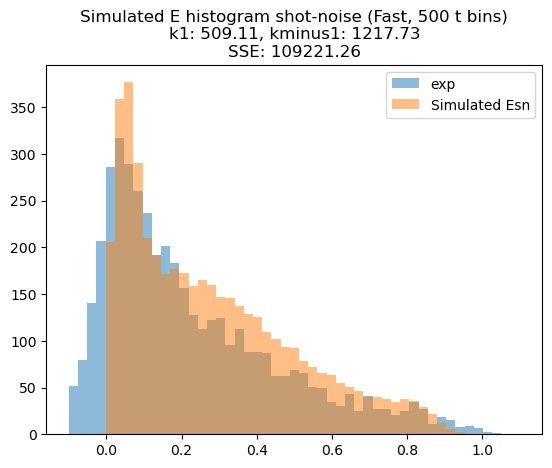

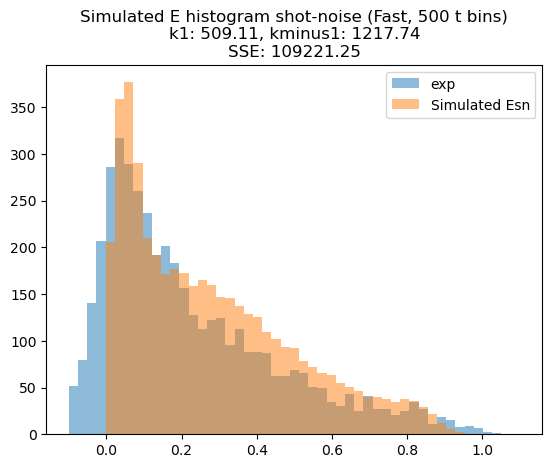

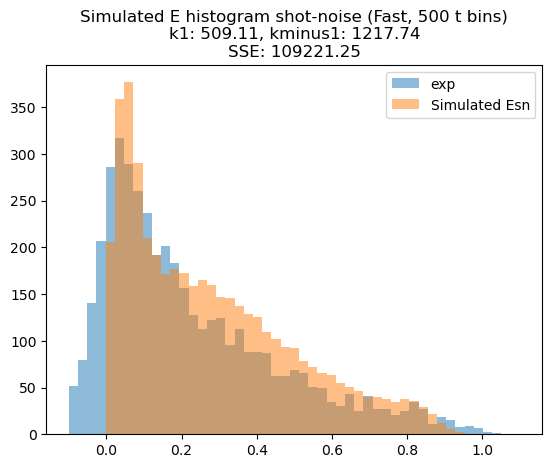

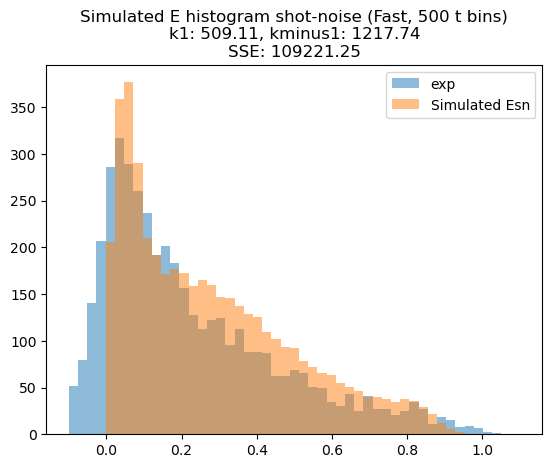

NaCl: 99.5, E1: 0.09, E2: 0.87
k1: 1680.5907	 kminus1: 1967.4692 Evaluated and added.
k1: 1297.9315	 kminus1: 1839.7820 Evaluated and added.
k1: 904.7809	 kminus1: 1533.6633 Evaluated and added.
k1: 629.5443	 kminus1: 965.4125 Evaluated and added.
k1: 612.4993	 kminus1: 689.4384 Evaluated and added.
k1: 783.1094	 kminus1: 980.9119 Evaluated and added.
k1: 723.5394	 kminus1: 888.7884 Evaluated and added.
k1: 693.9406	 kminus1: 834.2319 Evaluated and added.
k1: 701.9906	 kminus1: 847.2780 Evaluated and added.
k1: 701.9906	 kminus1: 847.2780 Evaluated and added.
      fun: 14842.225402960694
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.15804931,  0.42345315])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 10
     njev: 32
   status: 0
  success: True
        x: array([701.99055013, 847.2780291 ])


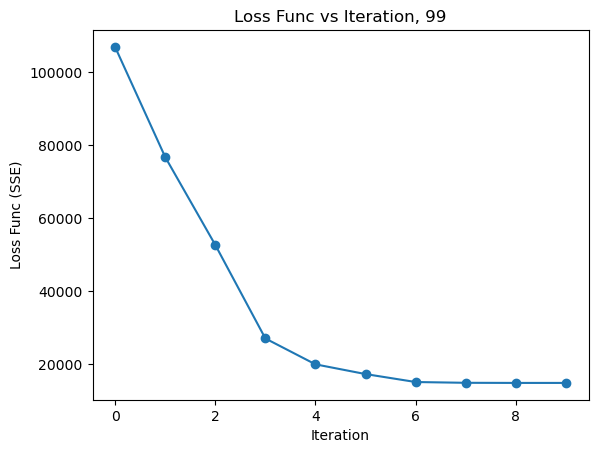

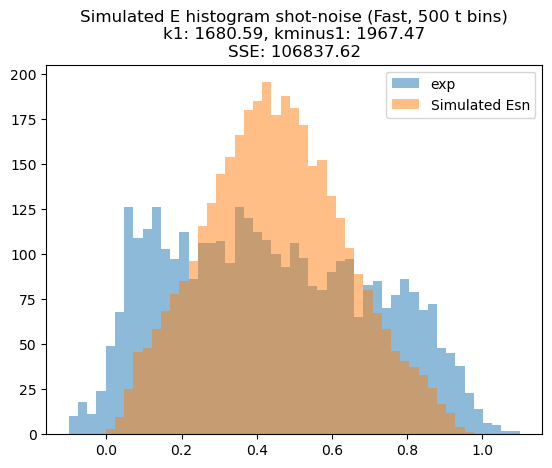

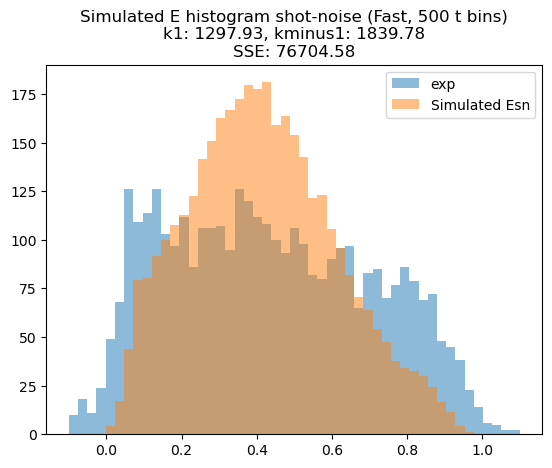

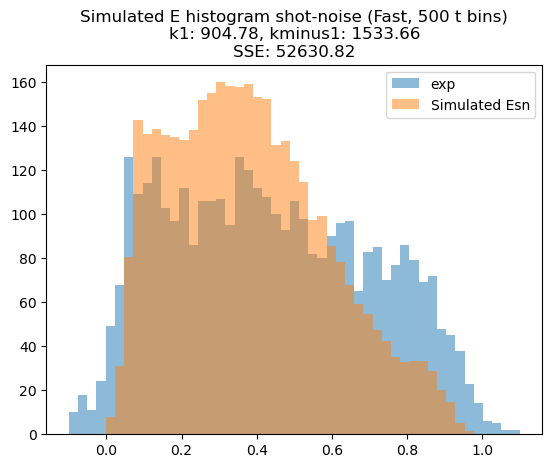

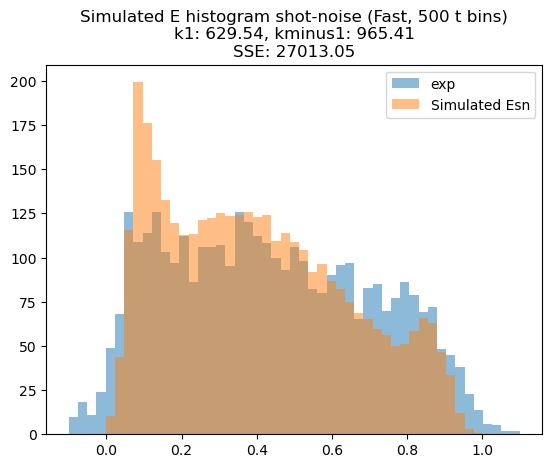

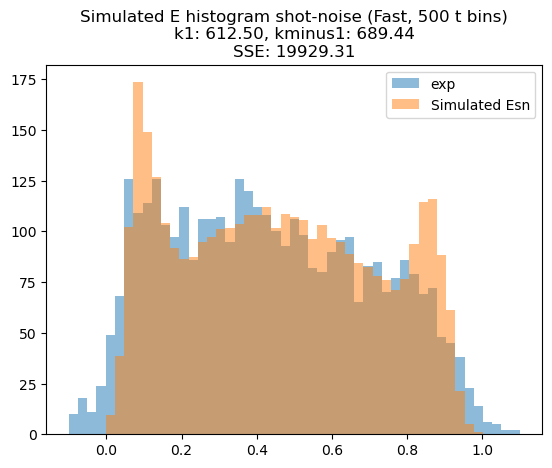

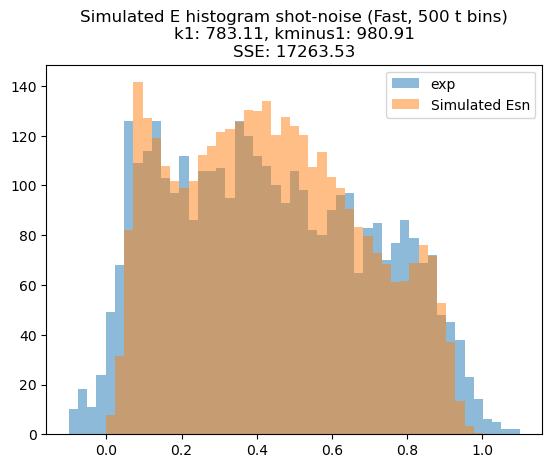

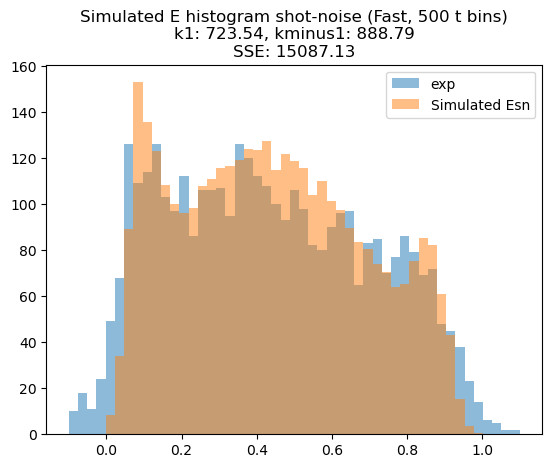

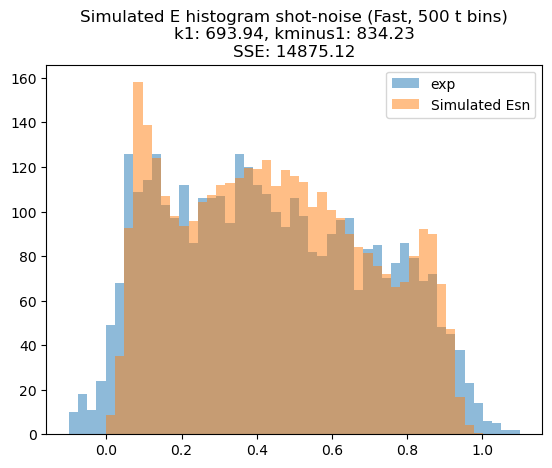

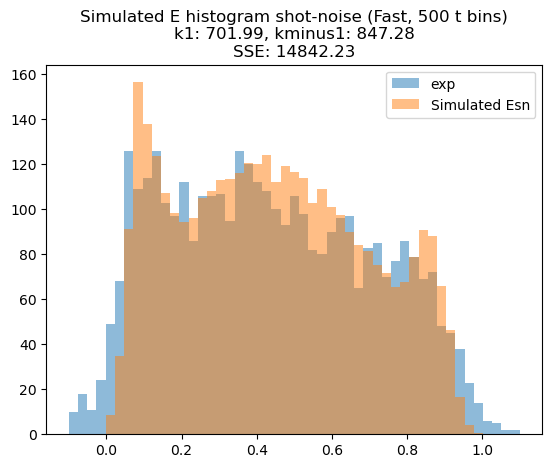

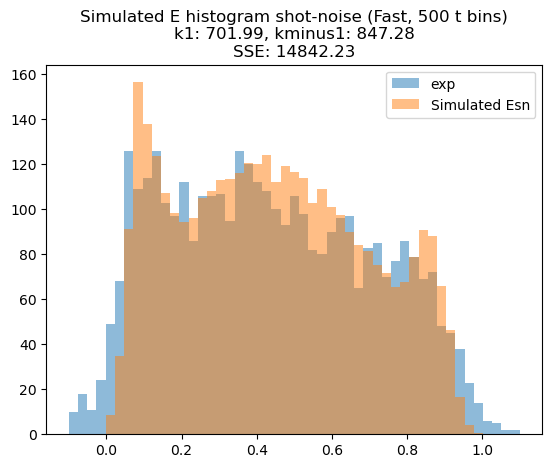

NaCl: 149.0, E1: 0.14, E2: 0.88
k1: 905.3721	 kminus1: 461.1693 Evaluated and added.
k1: 911.1400	 kminus1: 759.8070 Evaluated and added.
k1: 915.5980	 kminus1: 728.2447 Evaluated and added.
k1: 918.6809	 kminus1: 690.8666 Evaluated and added.
k1: 917.3087	 kminus1: 696.1165 Evaluated and added.
k1: 916.3991	 kminus1: 695.5256 Evaluated and added.
k1: 906.9548	 kminus1: 690.7548 Evaluated and added.
k1: 906.9672	 kminus1: 690.8933 Evaluated and added.
k1: 906.9633	 kminus1: 690.9048 Evaluated and added.
k1: 906.9634	 kminus1: 690.9048 Evaluated and added.
k1: 906.9634	 kminus1: 690.9048 Evaluated and added.
      fun: 6069.4978763632025
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.14745490e-07, 5.05788194e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 11
     njev: 18
   status: 0
  success: True
        x: array([906.96337588, 690.90482065])


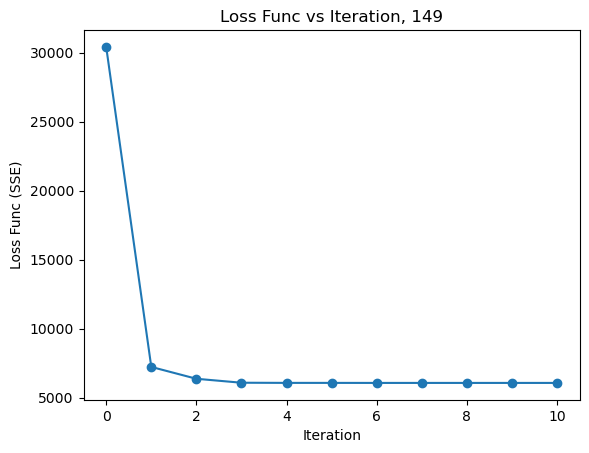

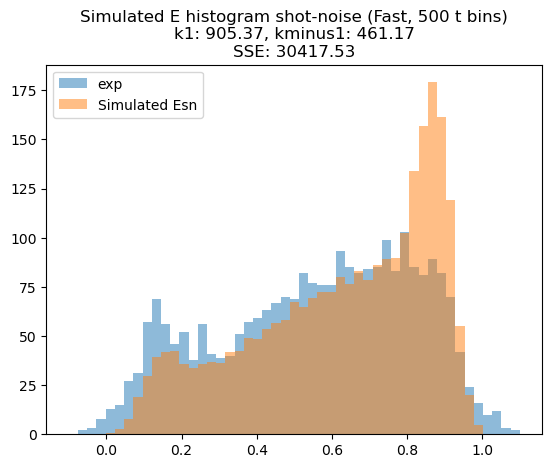

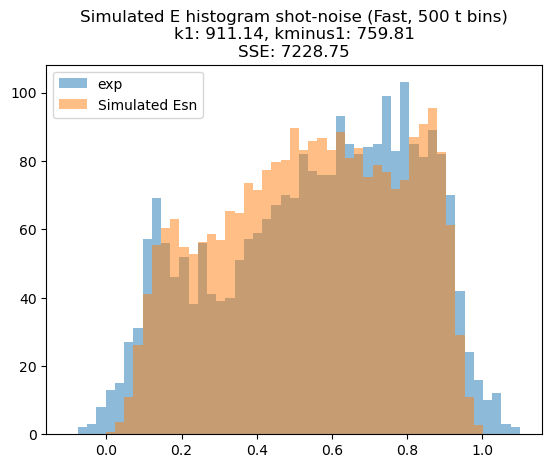

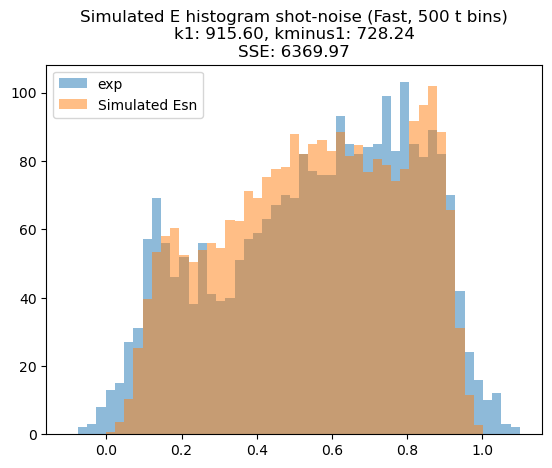

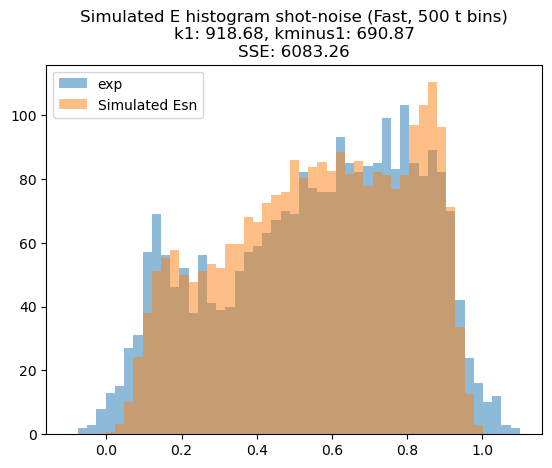

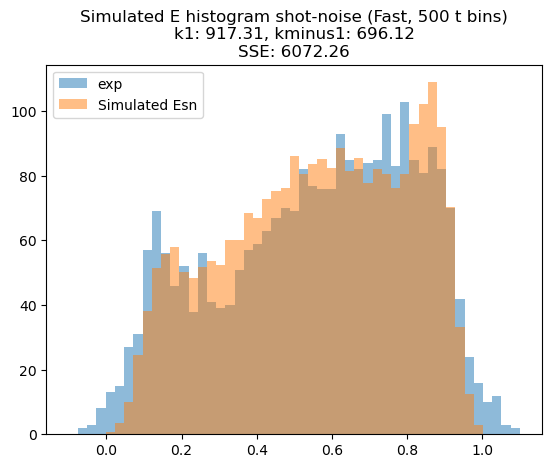

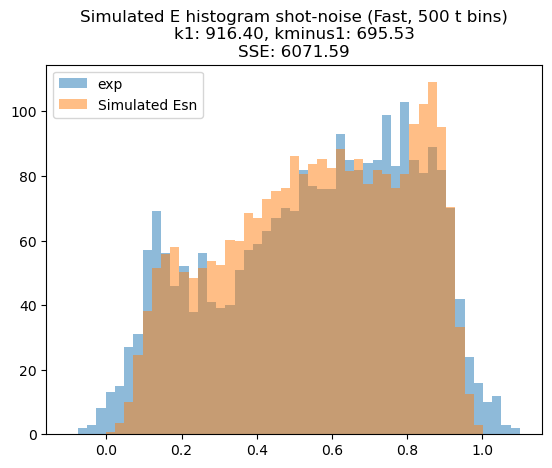

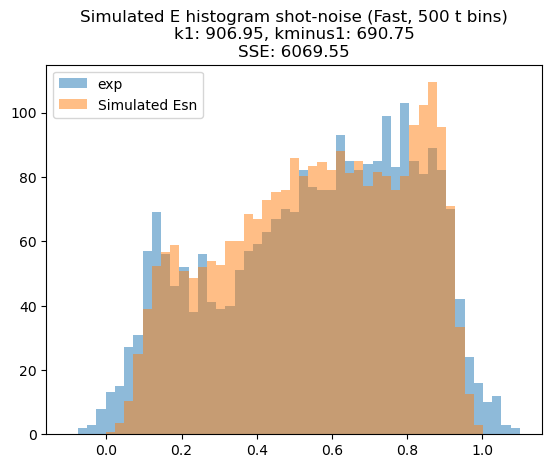

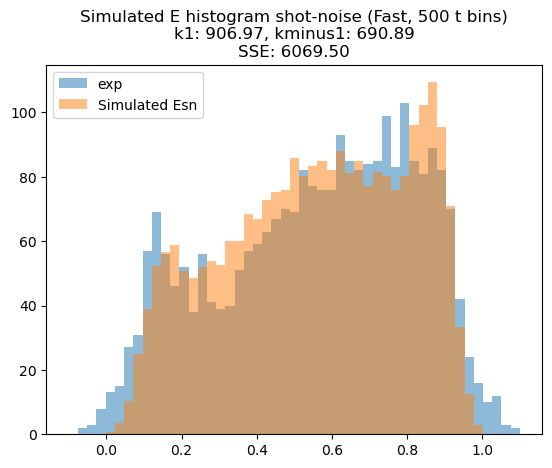

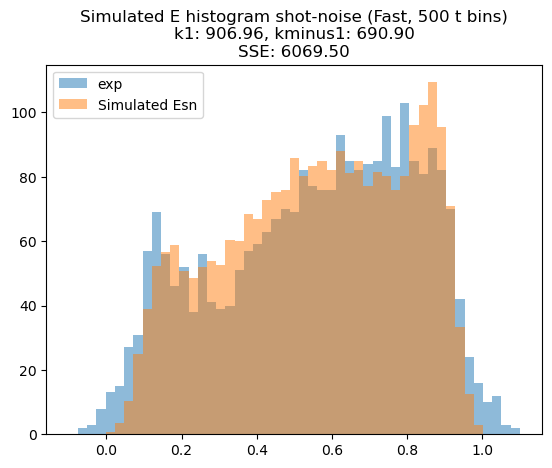

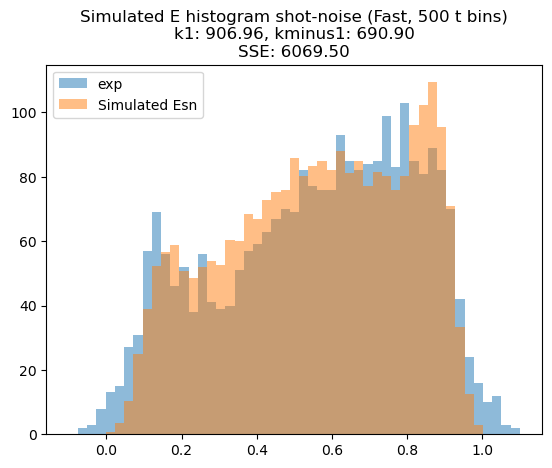

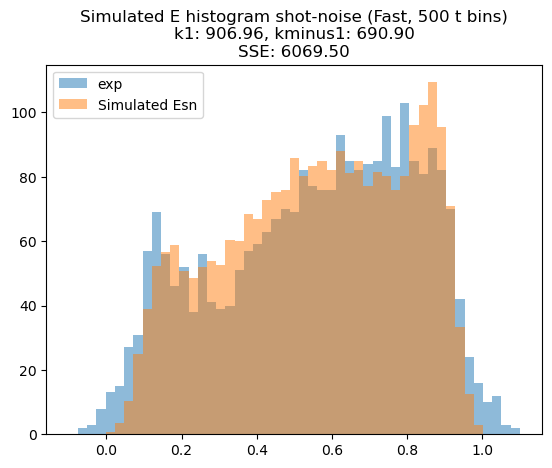

NaCl: 198.5, E1: 0.16, E2: 0.88
k1: 161.3779	 kminus1: 98.0252 Evaluated and added.
k1: 187.2866	 kminus1: 125.1495 Evaluated and added.
k1: 295.8809	 kminus1: 210.3259 Evaluated and added.
k1: 420.5436	 kminus1: 301.1809 Evaluated and added.
k1: 548.0770	 kminus1: 391.1061 Evaluated and added.
k1: 662.3396	 kminus1: 468.6480 Evaluated and added.
k1: 752.6111	 kminus1: 526.1867 Evaluated and added.
k1: 816.2991	 kminus1: 561.7442 Evaluated and added.
k1: 877.2182	 kminus1: 587.3778 Evaluated and added.
k1: 973.4669	 kminus1: 612.3762 Evaluated and added.
k1: 1085.1917	 kminus1: 621.7076 Evaluated and added.
k1: 1120.3969	 kminus1: 580.3635 Evaluated and added.
k1: 1143.8685	 kminus1: 587.3221 Evaluated and added.
k1: 1158.7550	 kminus1: 590.7740 Evaluated and added.
k1: 1159.4429	 kminus1: 591.0595 Evaluated and added.
k1: 1159.4429	 kminus1: 591.0595 Evaluated and added.
      fun: 27078.21093375793
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00769267,

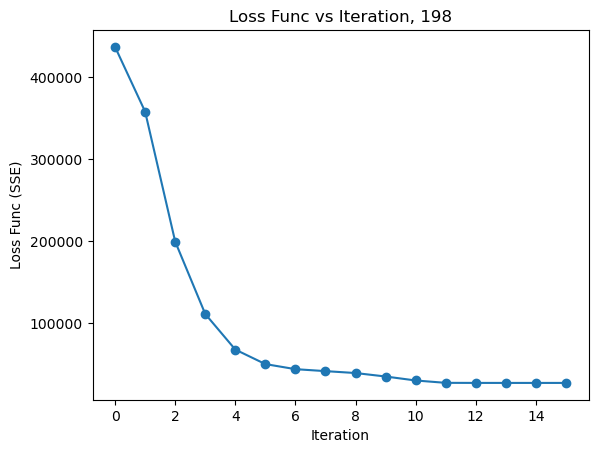

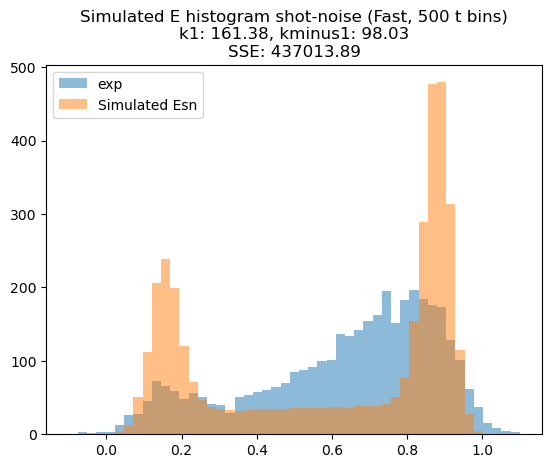

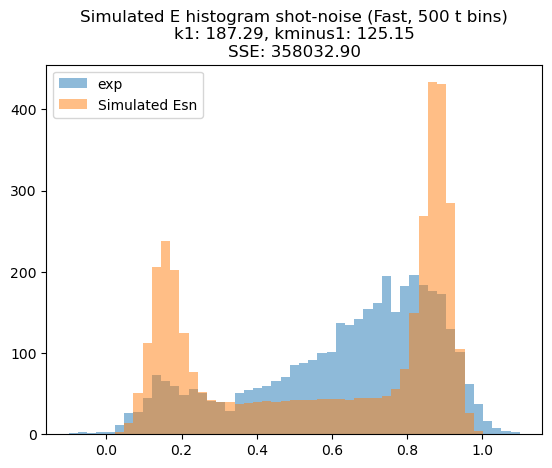

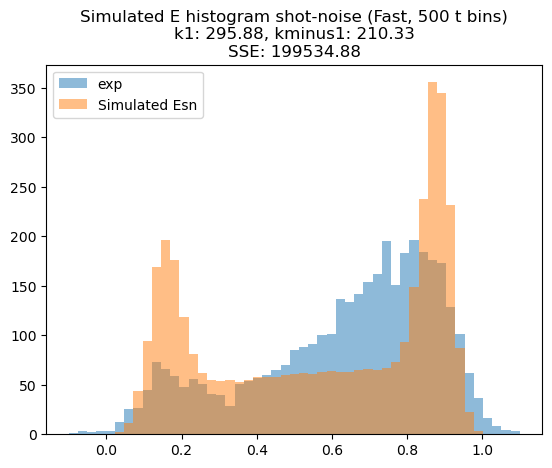

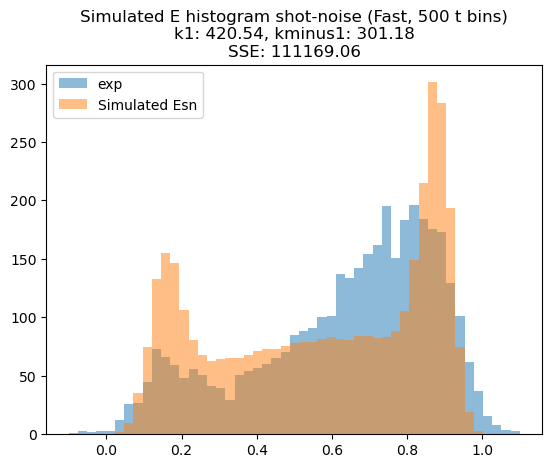

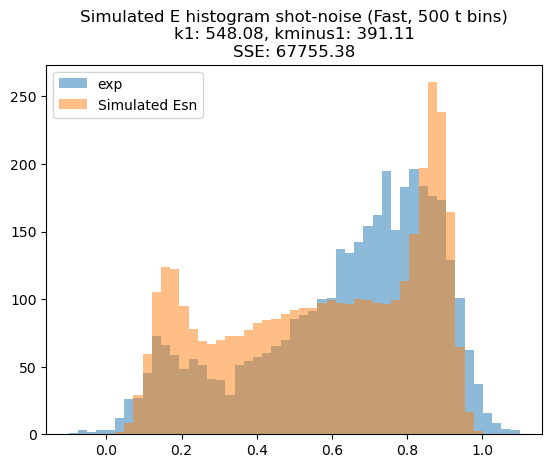

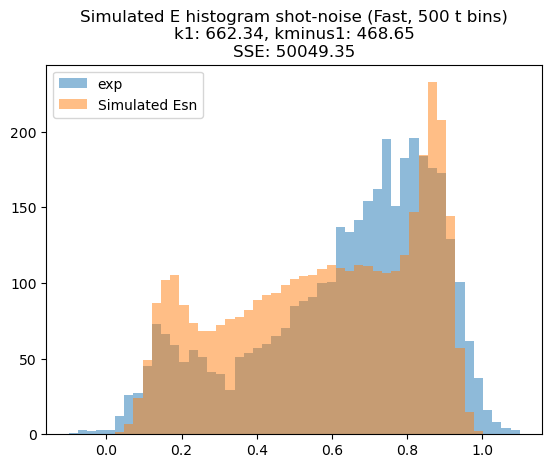

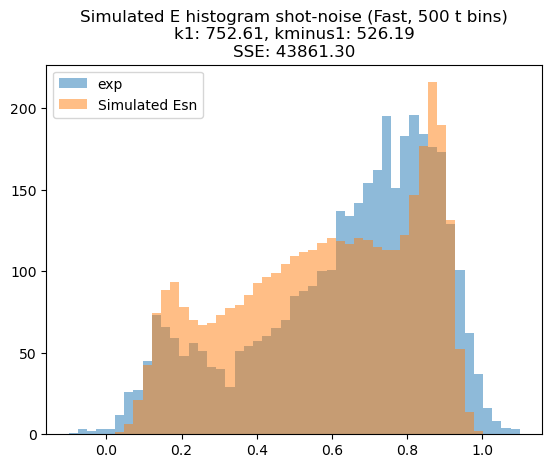

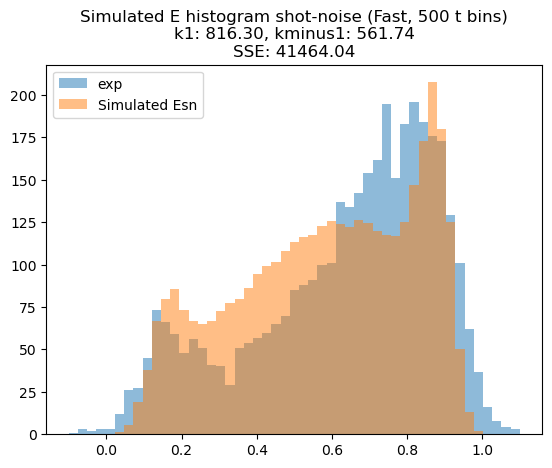

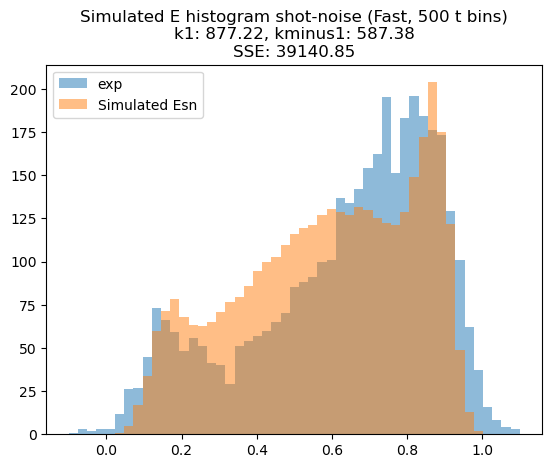

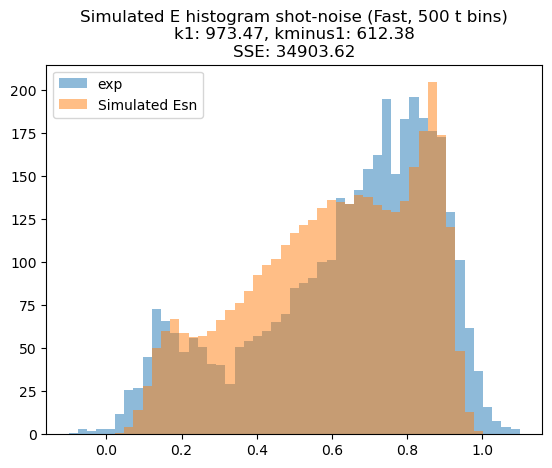

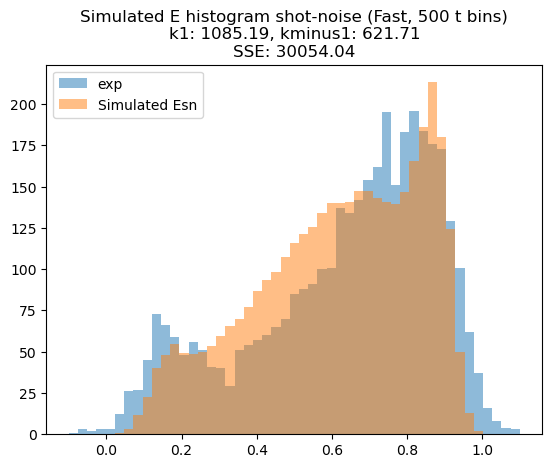

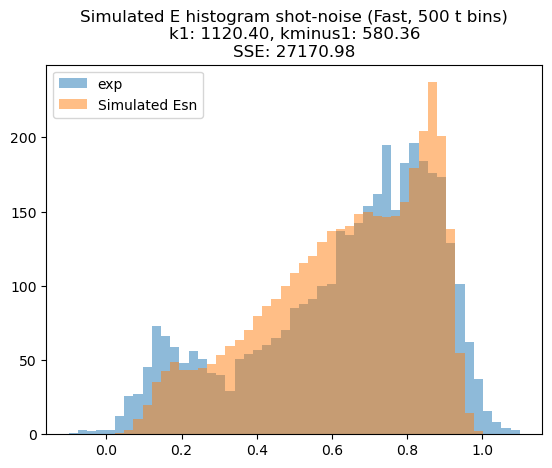

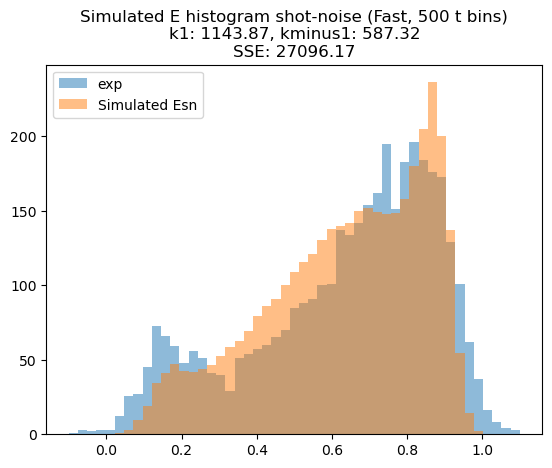

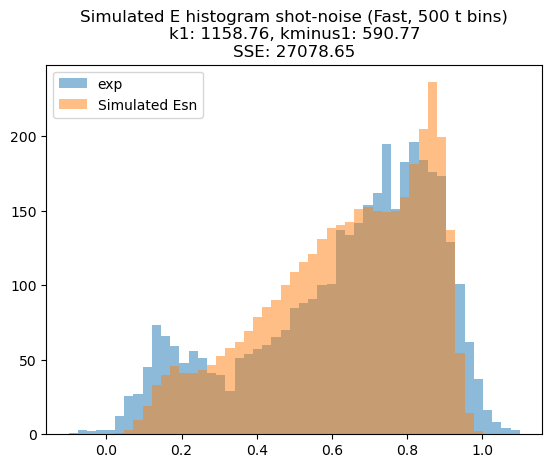

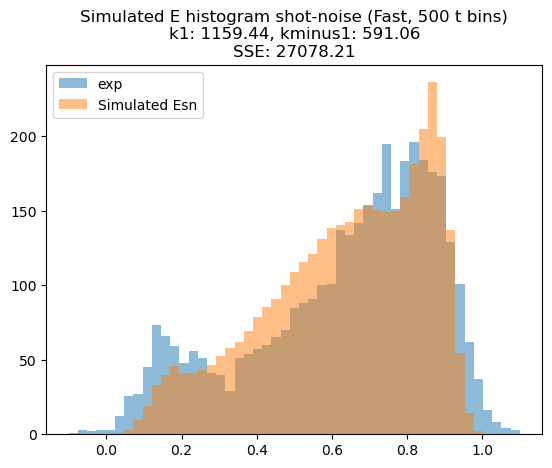

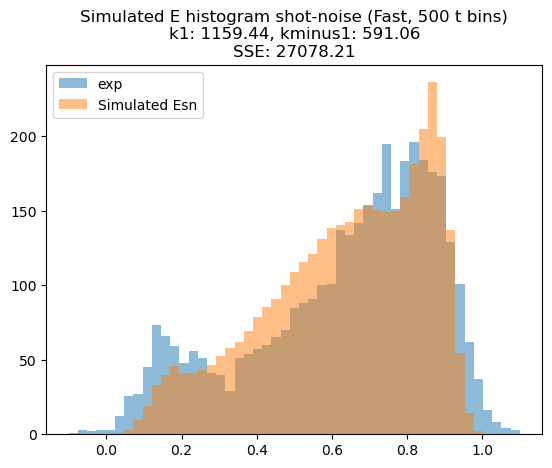

NaCl: 297.5, E1: 0.21, E2: 0.88
k1: 214.2916	 kminus1: 91.4765 Evaluated and added.
k1: 234.6188	 kminus1: 118.5341 Evaluated and added.
k1: 290.6744	 kminus1: 165.5233 Evaluated and added.
k1: 392.9415	 kminus1: 235.1338 Evaluated and added.
k1: 514.5845	 kminus1: 308.0181 Evaluated and added.
k1: 626.2476	 kminus1: 363.6098 Evaluated and added.
k1: 740.6985	 kminus1: 402.2172 Evaluated and added.
k1: 881.7213	 kminus1: 428.8768 Evaluated and added.
k1: 1034.4621	 kminus1: 444.8449 Evaluated and added.
k1: 1167.4241	 kminus1: 454.2159 Evaluated and added.
k1: 1255.6152	 kminus1: 461.4863 Evaluated and added.
k1: 1303.7871	 kminus1: 469.0657 Evaluated and added.
k1: 1310.3594	 kminus1: 471.3926 Evaluated and added.
k1: 1318.4969	 kminus1: 471.9898 Evaluated and added.
k1: 1318.5860	 kminus1: 472.0014 Evaluated and added.
k1: 1318.5871	 kminus1: 472.0016 Evaluated and added.
k1: 1318.5871	 kminus1: 472.0016 Evaluated and added.
k1: 1318.5871	 kminus1: 472.0016 Evaluated and added.
     

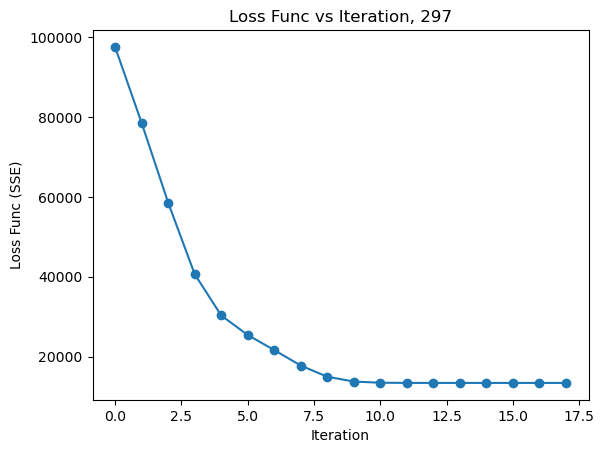

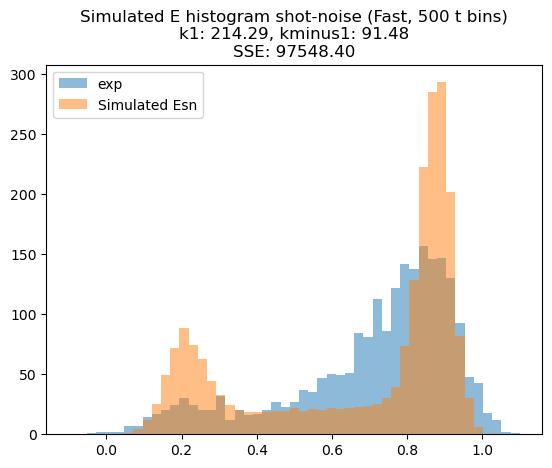

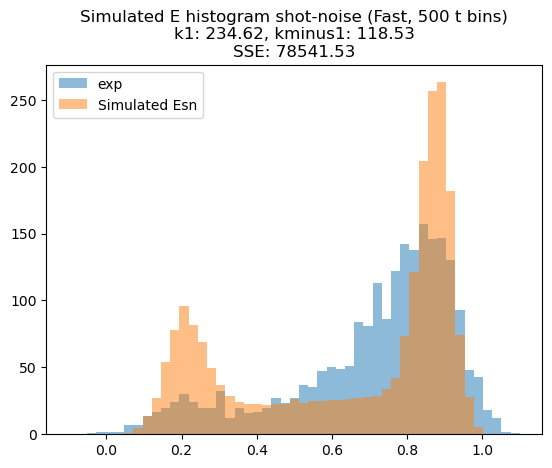

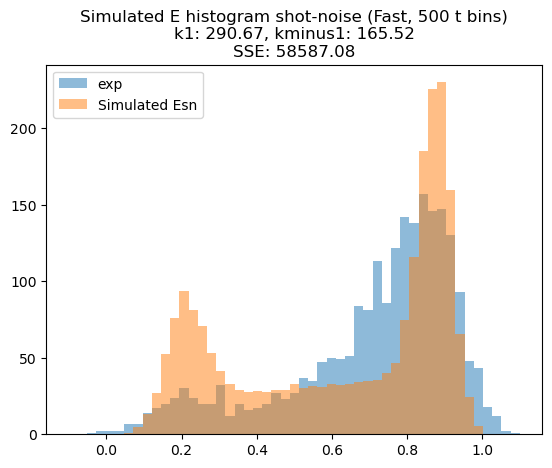

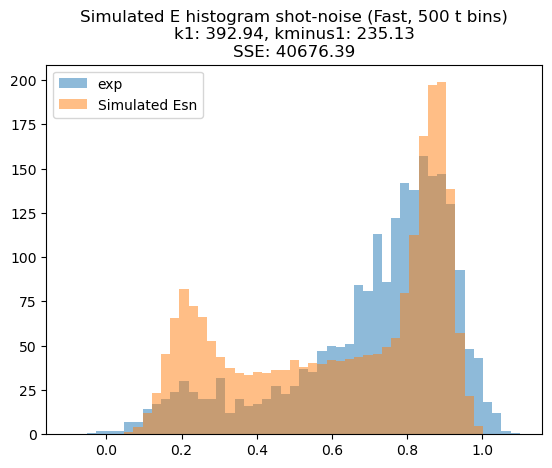

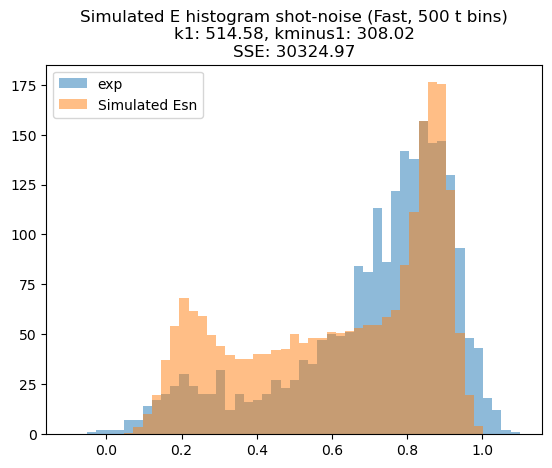

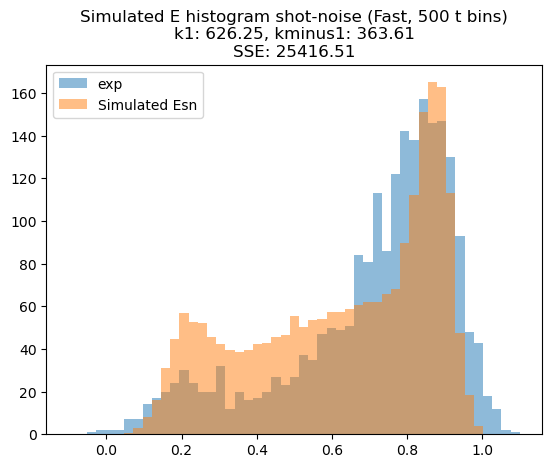

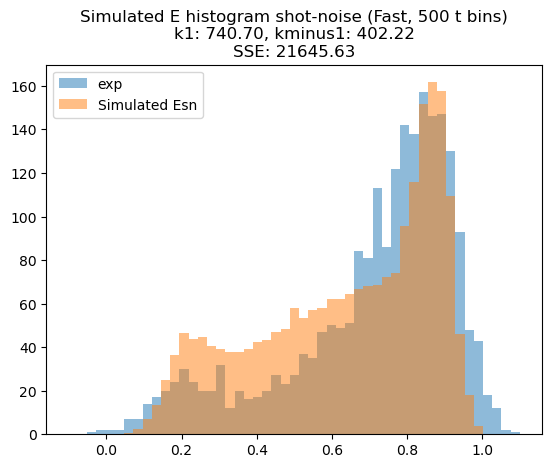

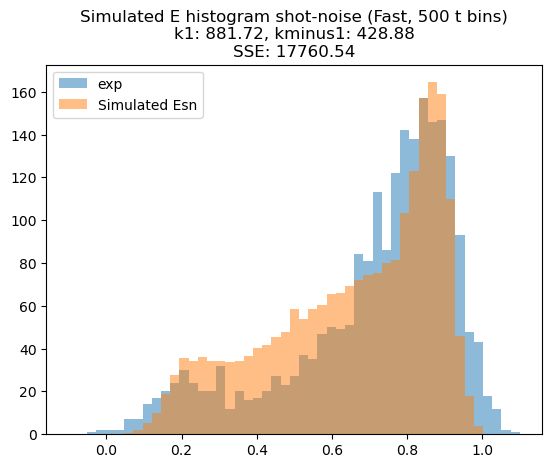

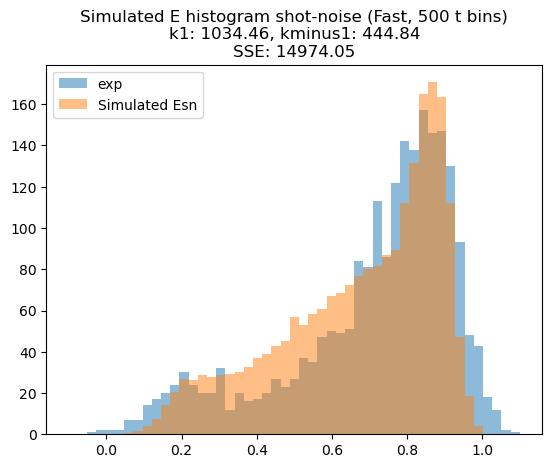

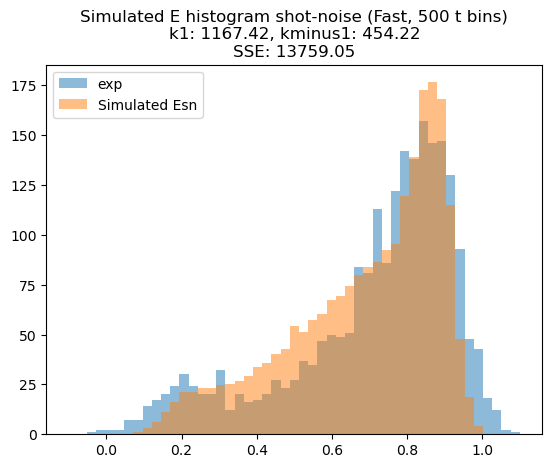

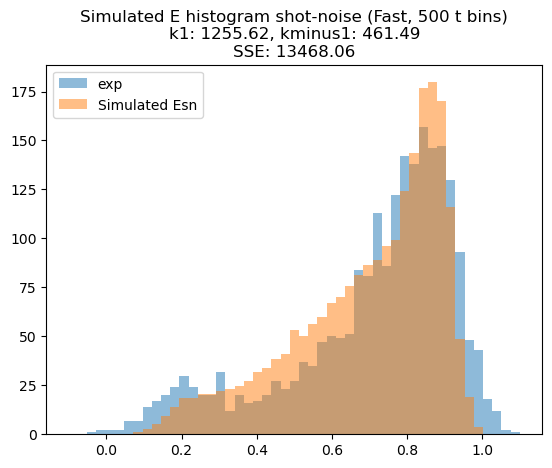

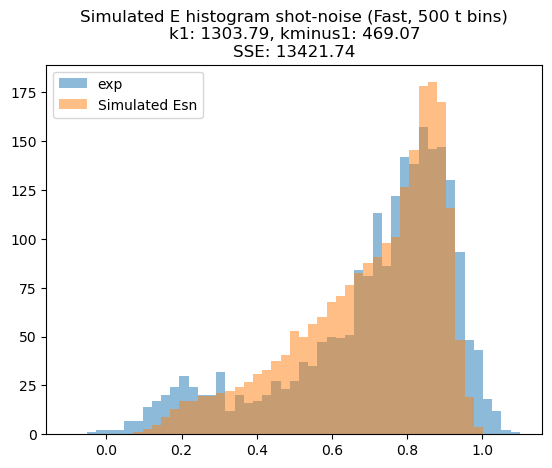

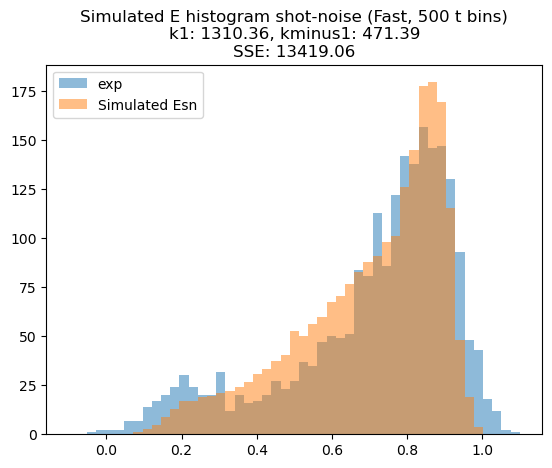

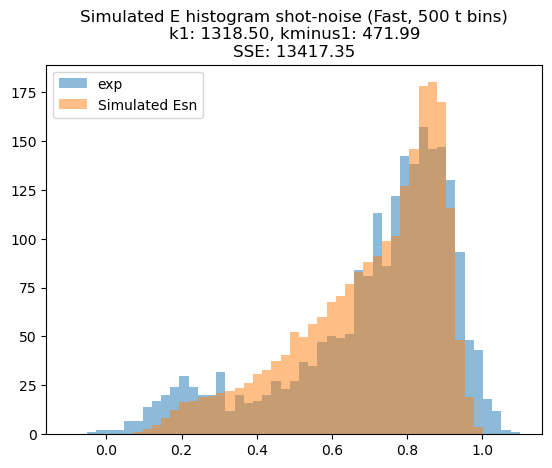

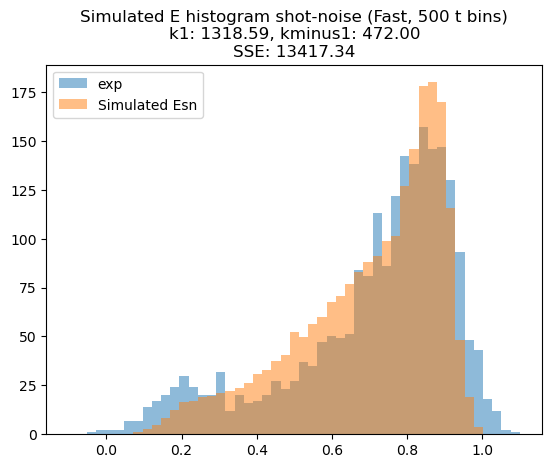

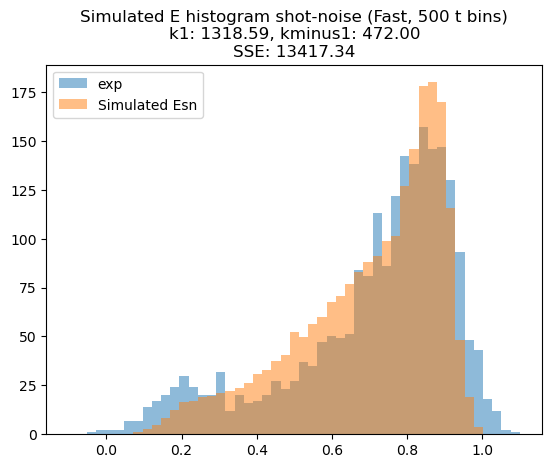

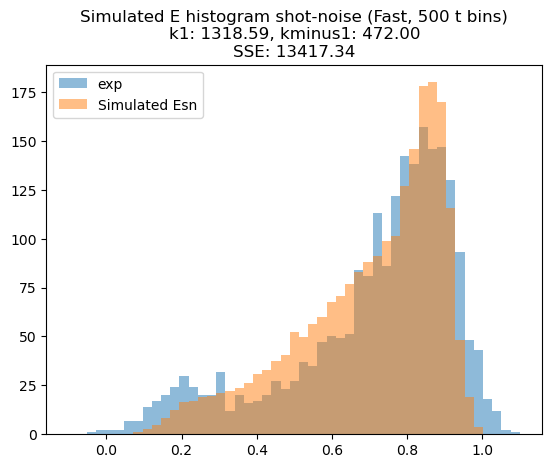

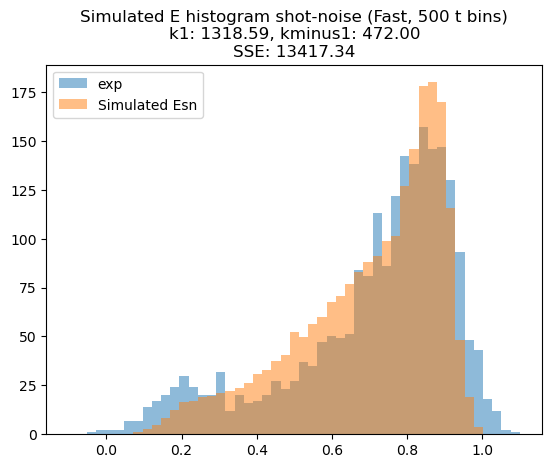

NaCl: 545.0, E1: 0.29, E2: 0.89
k1: 331.5097	 kminus1: 90.5756 Evaluated and added.
k1: 376.3299	 kminus1: 139.4583 Evaluated and added.
k1: 416.9395	 kminus1: 173.0923 Evaluated and added.
k1: 478.9950	 kminus1: 213.2639 Evaluated and added.
k1: 547.8691	 kminus1: 249.0013 Evaluated and added.
k1: 623.7605	 kminus1: 280.3845 Evaluated and added.
k1: 714.3605	 kminus1: 307.9980 Evaluated and added.
k1: 851.7264	 kminus1: 330.3022 Evaluated and added.
k1: 1030.8713	 kminus1: 344.6086 Evaluated and added.
k1: 1204.2652	 kminus1: 354.8656 Evaluated and added.
k1: 1351.7580	 kminus1: 366.8157 Evaluated and added.
k1: 1455.7173	 kminus1: 379.0591 Evaluated and added.
k1: 1490.3663	 kminus1: 383.3751 Evaluated and added.
      fun: 28911.482318679675
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.20083322,  0.89629073])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 165
      nit: 13
     njev: 55
   status: 2
  success: False
        x: array([1490.3663

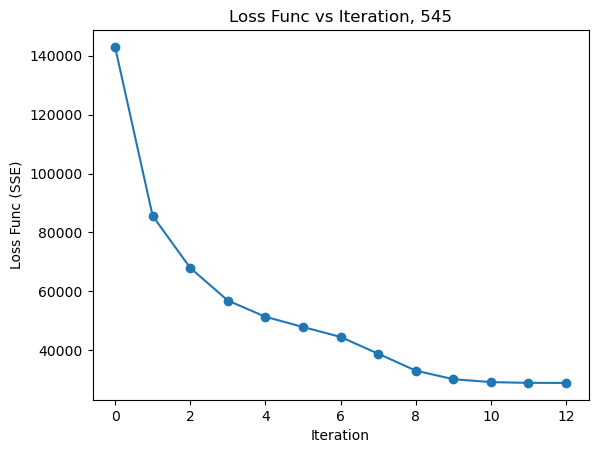

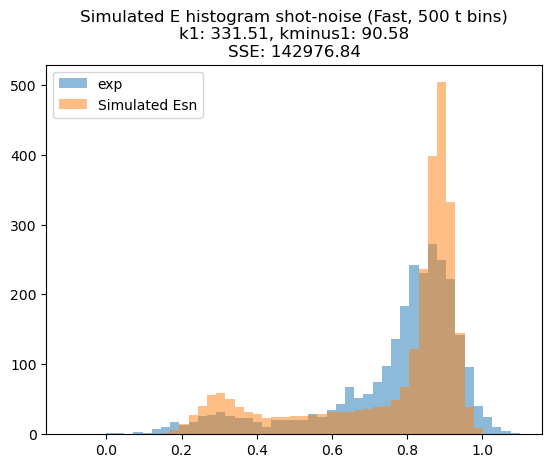

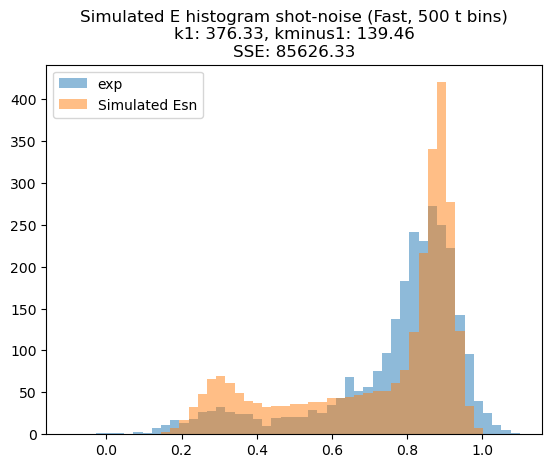

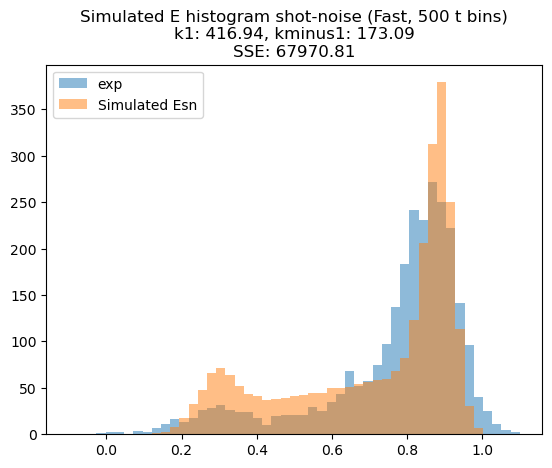

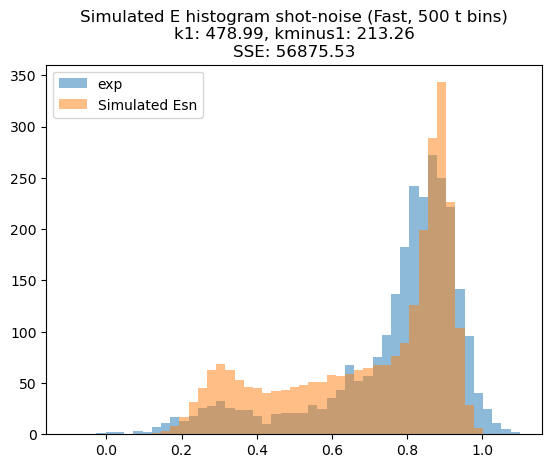

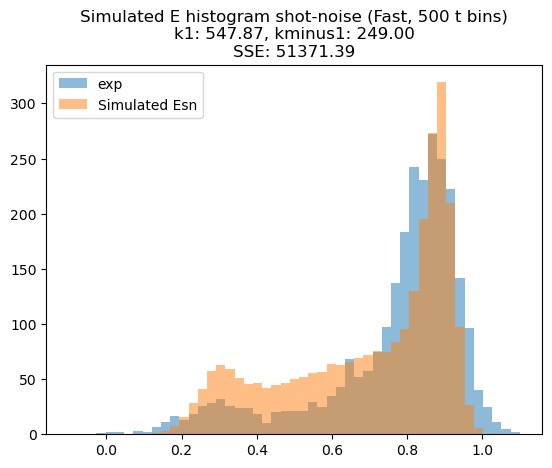

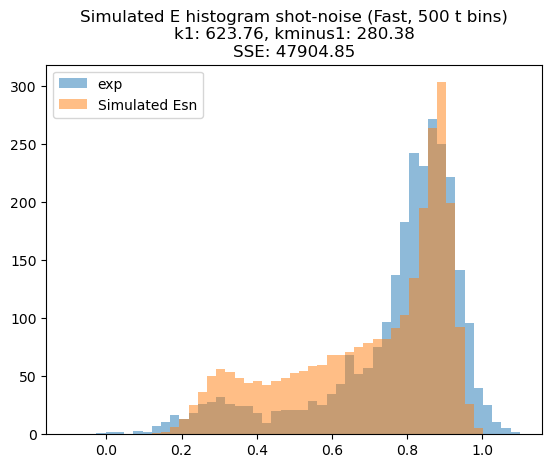

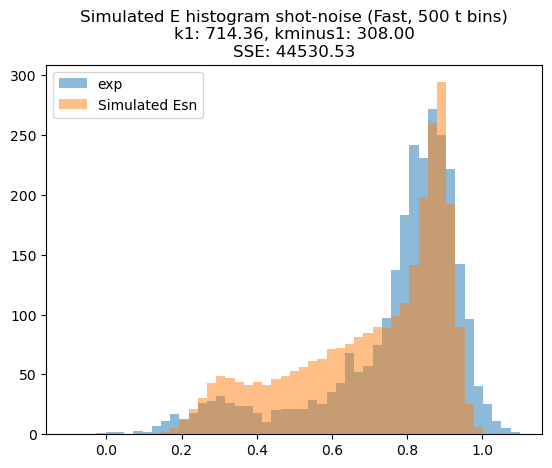

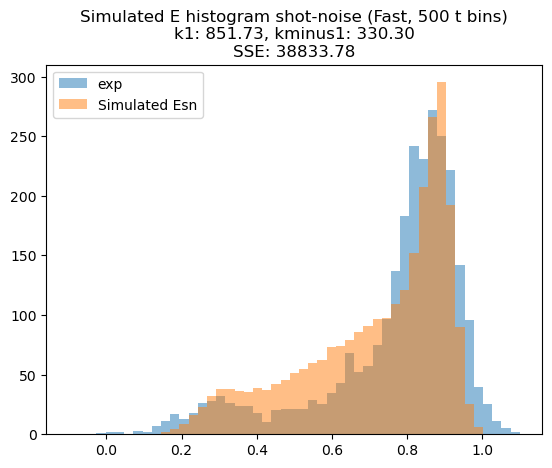

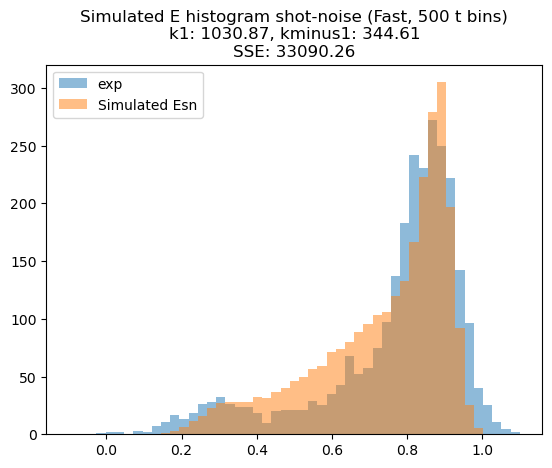

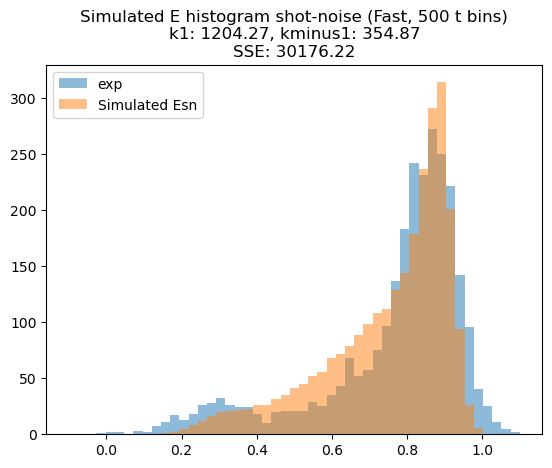

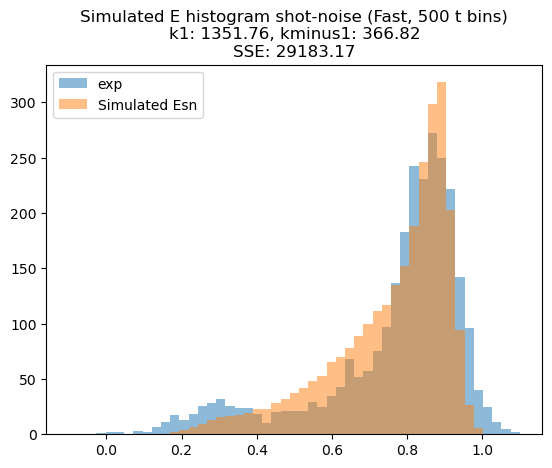

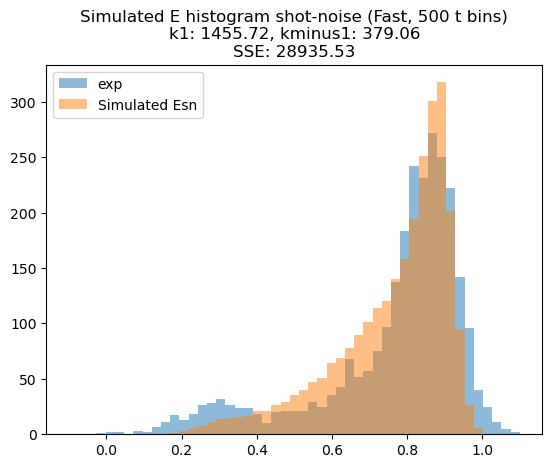

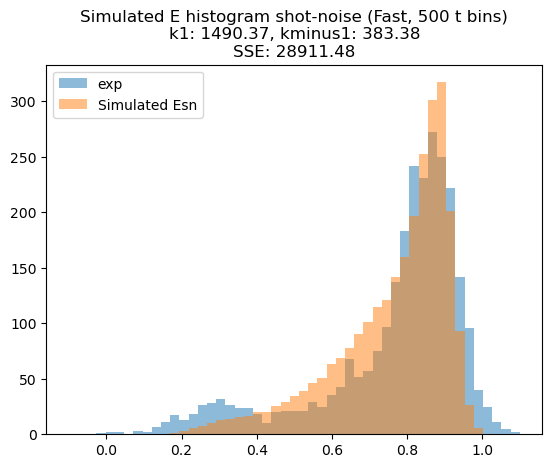

In [3]:
# Read Device Runs (With corrections)
device_data = pd.read_csv('./../processed_data/HairpinReferenceRunsWithCorrections.csv')
concs = sorted(set(device_data.NaCl_mM))

# Take data slice, high FRET 2CDE as dont want to filter on this
df_slice = MCF.typical_S_ALEX_FRET_CDE_filter(device_data, FRET2CDEmask = 20000)

# Check that burst binning is sensible
durationBins, durationBinCentres, dDuration = PF.getBins(0,11*1e-3,100)
durationHist, _ = np.histogram(df_slice['duration'], bins = durationBins)

# E bins
Ebins, EBinCentres, dBin = PF.getBins(-0.1,1.1,50)

# Quick Sample to develop function
for conc in concs:
    sample = df_slice[df_slice.NaCl_mM == conc]

    # Get Experimental E histogram
    exp_E = sample['E3_avg_beta_gamma']
    exp_E_Hist, _ = np.histogram(exp_E, Ebins)

    # Estimate good starting candidates for E1 and E2 by filtering out dynamics with FRET2CDE
    Eestimation = MCF.typical_S_ALEX_FRET_CDE_filter(sample)
    b, g, expEs, expSs = MCF.calculate_beta_and_gamma_correction(None,
                                                                 population_E_limits = [[0,0.5],[0.501, 1]], 
                                                                 E = Eestimation['E3_avg_beta_gamma'],
                                                                 S = Eestimation['S3_avg_beta_gamma'],
                                                                 sample_percent = 0.05,
                                                                 plot_fig = False)
    E1_0, E2_0 = expEs

    print(f'NaCl: {conc}, E1: {E1_0:0.2f}, E2: {E2_0:0.2f}')
    
    # Prime Optimisation config
    FAST_LOSS_FUNC_CONFIG = {'EXP_E_HIST':exp_E_Hist,
                             'BURST_DATA': sample,
                             'NUMBER_DURATION_BINS':NUMBER_DURATION_BINS,
                             'E_BINS':Ebins,
                             'E1':E1_0, 
                             'E2':E2_0,
                             'N': N,
                             'DEBUG':False}
    
    # Prime Specific Loss Function
    storedResultsList = []
    specificLossFunc =  PDA_FD.getSpecificFastLossFunctionFromConfig(FAST_LOSS_FUNC_CONFIG)
    callBackEvalFunc = PDA_FD.getCallbackEvalFuncFromConfig(FAST_LOSS_FUNC_CONFIG)

    # Prime Callback Func
    optPairEvals = []
    def storeNewSSE(kpair):
        global optPairEvals
        _sse, _fastpEsn = callBackEvalFunc(kpair, None)
        optPairEvals.append({'k1': kpair[0], 'kminus1': kpair[1], 'SSE':_sse , 'pEsn':_fastpEsn})
        print(f'k1: {kpair[0]:0.4f}\t kminus1: {kpair[1]:0.4f} Evaluated and added.')
        
    # Minimize, ftol, gtol very low as want to run for full 50 runs
    optResult = minimize(specificLossFunc,
                         args = (storedResultsList),
                         x0=np.array([100,100]),
                         bounds=((5,5000), (5,5000)),
                         callback = storeNewSSE,
                         method='L-BFGS-B',
                         options={'eps': [1, 1],
                                  'ftol': 1e-12,
                                  'gtol': 1e-12,
                                  'maxiter':50,
                                  'iprint': 99})

    print(optResult)
    
    PDA_FD.saveOptimisationResults(ROOT_DIR=ROOT_DIR, 
                                   optPairEvals=optPairEvals, 
                                   storedResultsList=storedResultsList, 
                                   uniqueRef=int(conc), 
                                   exp_E_Hist=exp_E_Hist, 
                                   EBinCentres=EBinCentres, 
                                   dBin=dBin, 
                                   numtBins=NUMBER_DURATION_BINS)
    

## Read All Results

In [18]:
optSummary = []

for conc in concs:
    # Read optVals csv
    optEvalPath = os.path.join(ROOT_DIR, f'{int(conc)}mM_AllIterEvals.csv')
    _data = pd.read_csv(optEvalPath).sort_values('SSE', ascending=True).iloc[0,:]
    optSummary.append({'NaCl_mM': int(conc), 'k1min': _data['k1'], 'kminus1min': _data['kminus1'], 'SSE': _data['SSE'], 'nBurstBins': _data['nBurstBins']})

optSummaryDF = pd.DataFrame(optSummary)

In [37]:
optSummaryDF.head()
optSummaryDF.to_csv(os.path.join(ROOT_DIR, 'optValsSummary.csv'), index=False)

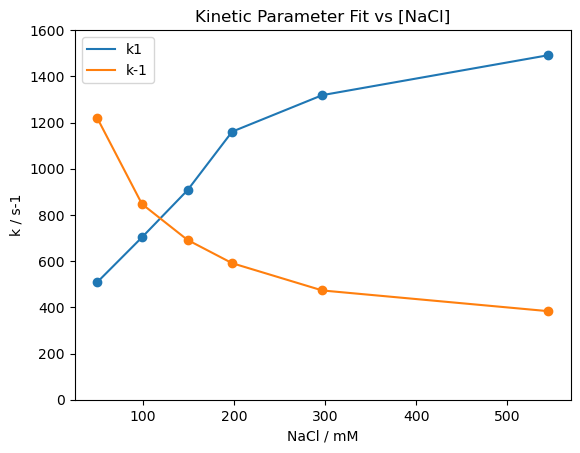

In [35]:
#k1
plt.plot(optSummaryDF.NaCl_mM, optSummaryDF.k1min, label = 'k1')
plt.scatter(optSummaryDF.NaCl_mM, optSummaryDF.k1min)

# k-1
plt.plot(optSummaryDF.NaCl_mM, optSummaryDF.kminus1min, label = 'k-1')
plt.scatter(optSummaryDF.NaCl_mM, optSummaryDF.kminus1min)

plt.title('Kinetic Parameter Fit vs [NaCl]')
plt.legend()
plt.ylim(0,1600)
plt.ylabel('k / s-1')
plt.xlabel('NaCl / mM')
plt.savefig(os.path.join(ROOT_DIR, 'FitSummary.png'))
plt.show()